In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [67]:
df = pd.read_csv("building_units_inspection.csv")

In [68]:
df.head()

,unit,status,no_rooms,no_bath,area(ftsq),id,price,type,units,stories,...,Single-Family Home,Full-time Doorman,Elevator,Pets Allowed,Doorman,Cats Only - No Dogs,Cats and Dogs Allowed,Part-time Doorman,ZIPCODE,SCORE
7,#2D,"Listed for sale at $848,000",2.0,1.0,646,784204,848000.0,sold,28.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10002.0,22.023928
8,#4,"Off-Market on 09/28/2015 at $3,200",2.0,1.0,650,784204,3200.0,unlabeled,28.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10002.0,22.023928
9,#4D,"Off-Market on 08/04/2017 at $3,950",1.0,1.0,646,784204,3950.0,unlabeled,28.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10002.0,22.023928
10,#D,"Off-Market on 04/07/2015 at $2,900",2.0,1.0,800,784204,2900.0,unlabeled,28.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10002.0,22.023928
11,#7B,"Off-Market on 03/19/2018 at $2,975",1.0,1.0,485,784204,2975.0,unlabeled,28.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10002.0,22.023928


In [69]:
df.columns

Index(['unit', 'status', 'no_rooms', 'no_bath', 'area(ftsq)', 'id', 'price',
       'type', 'units', 'stories', 'zip', 'age', 'Co-op', 'Condo',
       'Rental Building', 'Single-Family Home', 'Full-time Doorman',
       'Elevator', 'Pets Allowed', 'Doorman', 'Cats Only - No Dogs',
       'Cats and Dogs Allowed', 'Part-time Doorman', 'ZIPCODE', 'SCORE'],
      dtype='object')

In [70]:
df.loc[df['type']=='rent'].count()[0]

321

In [71]:
df.loc[df['type']=='sold'].count()[0]

4396

In [72]:
df.loc[df['type']=='unlabeled'].count()[0]

10712

In [73]:
df['status'].loc[df['type']=='unlabeled']

8             Off-Market on 09/28/2015 at $3,200
9             Off-Market on 08/04/2017 at $3,950
10            Off-Market on 04/07/2015 at $2,900
11            Off-Market on 03/19/2018 at $2,975
12            Off-Market on 02/02/2015 at $2,300
18            Off-Market on 11/26/2018 at $3,499
19            Off-Market on 11/26/2018 at $3,499
22            Off-Market on 02/25/2017 at $2,800
23            Off-Market on 02/25/2017 at $2,800
24            Off-Market on 08/02/2017 at $2,800
25            Off-Market on 08/02/2017 at $2,800
26            Off-Market on 03/03/2016 at $2,600
27            Off-Market on 03/03/2016 at $2,600
28            Off-Market on 04/13/2018 at $2,650
29            Off-Market on 04/13/2018 at $2,650
30           Off-Market on 12/08/2014 at $12,000
31            Off-Market on 04/22/2014 at $3,995
32        Off-Market on 07/14/2017 at $1,100,000
33            Off-Market on 01/10/2016 at $4,500
35            Off-Market on 10/25/2018 at $3,350
38            Off-Ma

In [10]:
X = df[['no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'zip', 'age', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman', 'SCORE']].copy()

In [11]:
y = df['price'].copy()

## label distribution
    - Binomial dist because we have both rental and for-sale

In [12]:
def plot_dist(label):
    from scipy.stats import skew
    from scipy import stats
    from scipy.stats.stats import pearsonr
    from scipy.stats import norm
    #label = np.log1p(y)
    sns.distplot(label , fit=norm)
    (mu, sigma) = norm.fit(label)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    fig = plt.figure()
    res = stats.probplot(label, plot=plt)
    plt.show()

    print("Skewness: %f" % label.skew())
    print("Kurtosis: %f" % label.kurt())

/anaconda3/envs/ads/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 1257943.91 and sigma = 4208788.53



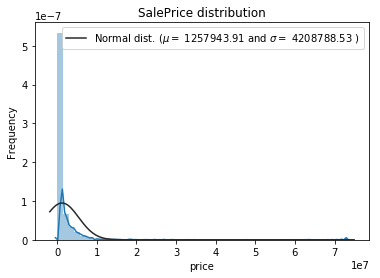

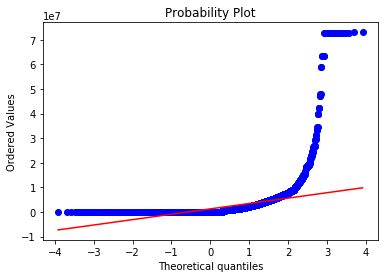

Skewness: 11.547150
Kurtosis: 174.008517


In [13]:
plot_dist(y)


 mu = 10.71 and sigma = 3.04



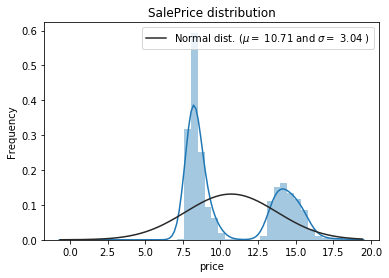

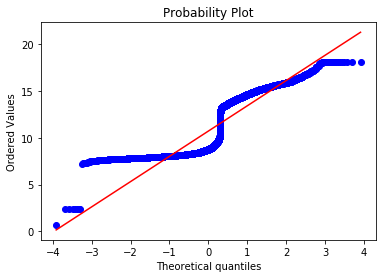

Skewness: 0.540629
Kurtosis: -1.445475


In [14]:
plot_dist(np.log1p(y))

In [15]:
temp = np.log1p(y)
rental = temp[temp<11]
sale = temp[temp>11]

In [58]:
len(df['type'].loc[temp.index].loc[df['type']=='rent'])

321


 mu = 8.39 and sigma = 0.55



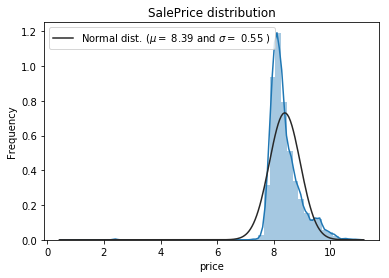

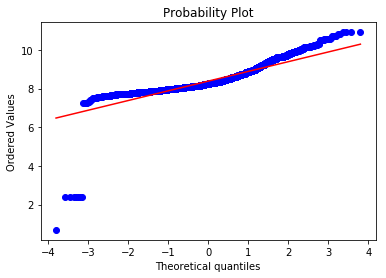

Skewness: -0.098940
Kurtosis: 15.654677


ValueError: Can only compare identically-labeled Series objects

In [34]:
plot_dist(rental)
print(rental.shape, df.loc[df['price']==rental]['label'])


 mu = 14.48 and sigma = 0.91



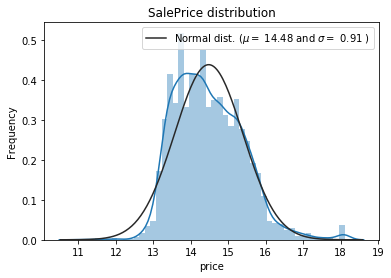

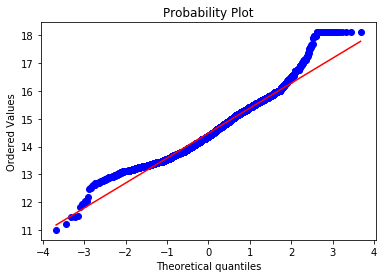

Skewness: 0.656040
Kurtosis: 0.831154
(5871,)


In [17]:
plot_dist(sale)
print(sale.shape)

## feature correlation

In [22]:
data = df[['price', 'no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'age', 'SCORE', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman']].copy()
data['price'] = np.log1p(data["price"])

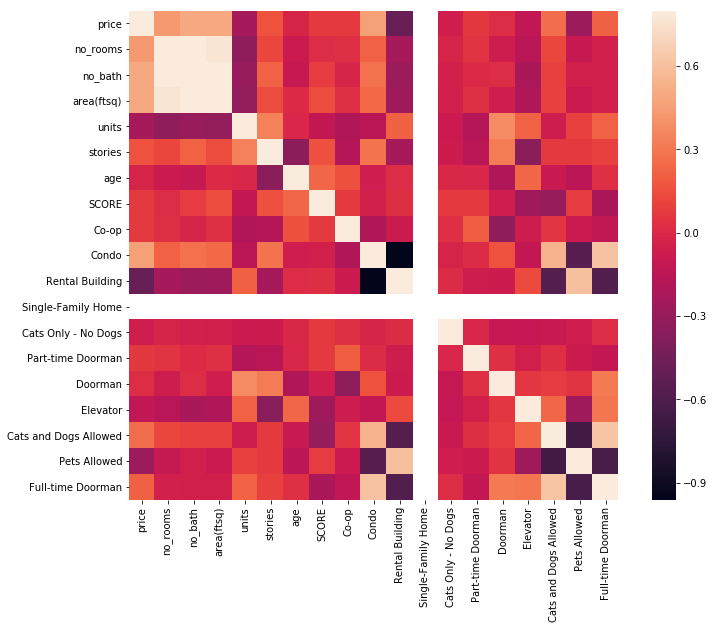

In [23]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
# most correlated features
corrmat.nlargest(10, 'price')['price'].index[1:]

Index(['no_bath', 'area(ftsq)', 'Condo', 'no_rooms', 'Cats and Dogs Allowed',
       'Full-time Doorman', 'stories', 'Co-op', 'SCORE'],
      dtype='object')

# Fit models

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from mlxtend.regressor import StackingCVRegressor

In [15]:
def pipline_models(X, y, model, coef=True, feature_importances=False):
    var_names = ['no_rooms', 'no_bath', 'area(ftsq)', 'units',
       'stories', 'age', 'SCORE', 'Co-op', 'Condo', 'Rental Building',
       'Single-Family Home', 'Cats Only - No Dogs', 'Part-time Doorman',
       'Doorman', 'Elevator', 'Cats and Dogs Allowed', 'Pets Allowed',
       'Full-time Doorman']
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lm = model.fit(X_train, y_train)
    print("IS r2: ", lm.score(X_train, y_train))
    print("OS r2: ", lm.score(X_test, y_test))
    if coef:
        print([i+": "+str(j) for i,j in zip(var_names, lm.coef_)])
    if feature_importances:
        print([i+": "+str(j) for i,j in zip(var_names, lm.feature_importances_)])

## rental model

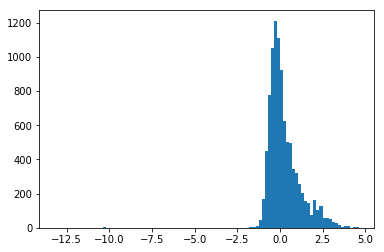

In [16]:
# scale the variables for better accuracy
rental_data = data.loc[data['status'] < 11]
rental_data = RobustScaler().fit_transform(rental_data)
plt.hist(rental_data[:, 0], bins=100)
plt.show()

In [17]:
# remove outliers
# distribution has two peaks => what to do?
rental_data = rental_data[rental_data[:, 0] > -5.0]
X = rental_data[:, 1:]
y = rental_data[:, 0]

In [18]:
y

array([-0.32251902,  0.04472369, -0.4941988 , ...,  1.75004962,
       -0.04590046,  3.52229405])

In [19]:
# svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))  # to be tunned 
# gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
#                                 max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
#                                 loss='huber', random_state =0) # to be tunned   
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
lasso = LassoCV(max_iter=1e7, random_state=0, cv=kfolds)  # alphas to be tunned  

In [20]:
pipline_models(X, y, lasso)
print()
pipline_models(X, y, LinearRegression())
print()
pipline_models(X, y, SVR(kernel='linear', C= 20, epsilon= 0.008, gamma=0.0003))
print()
pipline_models(X, y, RandomForestRegressor(n_estimators=100), coef=False, feature_importances=True)
print()

IS r2:  0.8279962966197085
OS r2:  0.8379130529829986
['no_rooms: 0.312791127287911', 'no_bath: 0.4022031683601659', 'area(ftsq): 0.3189462099410493', 'units: -0.1624207737607272', 'stories: 0.1342868164818286', 'age: -0.1320852465604409', 'SCORE: 0.007648112806741573', 'Co-op: 0.03601481676131085', 'Condo: -0.0', 'Rental Building: -0.0', 'Single-Family Home: 0.0', 'Cats Only - No Dogs: -0.17070453285471088', 'Part-time Doorman: -0.20588651521813503', 'Doorman: 0.09951597779143459', 'Elevator: -0.005747603317550479', 'Cats and Dogs Allowed: 0.04239829083143735', 'Pets Allowed: -0.014809349034269146', 'Full-time Doorman: -0.059010255483087186']

IS r2:  0.8285355676883752
OS r2:  0.8376408495922322
['no_rooms: 0.31993736038321074', 'no_bath: 0.4007297701335254', 'area(ftsq): 0.31646949263682345', 'units: -0.16343538285950007', 'stories: 0.1294841044906803', 'age: -0.14102666935440367', 'SCORE: 0.012644375052811423', 'Co-op: 0.12109714515935296', 'Condo: -0.06063164549951305', 'Rental Bu

## sales model

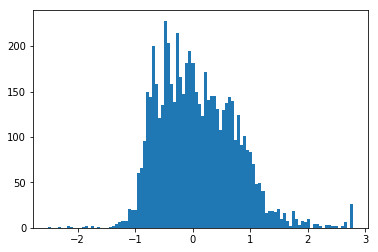

In [21]:
sales_data = data.loc[data['status'] > 11]
sales_data = RobustScaler().fit_transform(sales_data)
plt.hist(sales_data[:, 0], bins=100)
plt.show()

In [22]:
X = rental_data[:, 1:]
y = rental_data[:, 0]

In [23]:
y

array([-0.32251902,  0.04472369, -0.4941988 , ...,  1.75004962,
       -0.04590046,  3.52229405])

In [24]:
pipline_models(X, y, lasso)
print()
pipline_models(X, y, LinearRegression())
print()
pipline_models(X, y, SVR(kernel='linear', C= 20, epsilon= 0.008, gamma=0.0003))
print()
pipline_models(X, y, RandomForestRegressor(n_estimators=100), coef=False, feature_importances=True)
print()

IS r2:  0.8279962966197085
OS r2:  0.8379130529829986
['no_rooms: 0.312791127287911', 'no_bath: 0.4022031683601659', 'area(ftsq): 0.3189462099410493', 'units: -0.1624207737607272', 'stories: 0.1342868164818286', 'age: -0.1320852465604409', 'SCORE: 0.007648112806741573', 'Co-op: 0.03601481676131085', 'Condo: -0.0', 'Rental Building: -0.0', 'Single-Family Home: 0.0', 'Cats Only - No Dogs: -0.17070453285471088', 'Part-time Doorman: -0.20588651521813503', 'Doorman: 0.09951597779143459', 'Elevator: -0.005747603317550479', 'Cats and Dogs Allowed: 0.04239829083143735', 'Pets Allowed: -0.014809349034269146', 'Full-time Doorman: -0.059010255483087186']

IS r2:  0.8285355676883752
OS r2:  0.8376408495922322
['no_rooms: 0.31993736038321074', 'no_bath: 0.4007297701335254', 'area(ftsq): 0.31646949263682345', 'units: -0.16343538285950007', 'stories: 0.1294841044906803', 'age: -0.14102666935440367', 'SCORE: 0.012644375052811423', 'Co-op: 0.12109714515935296', 'Condo: -0.06063164549951305', 'Rental Bu